<a href="https://colab.research.google.com/github/Dannais/sales_predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Carga de Datos**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np

In [2]:
Sales_filename = '/content/drive/MyDrive/Cursos Data Science/Coding Dojo/1. Data Science Fundamentals/0. Fuente de Datos/sales_predictions.csv'
df_sales = pd.read_csv(Sales_filename)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Limpieza de Datos**

## Cantidad de filas y columnas y tipos de datos
1) ¿Cuántas filas y columnas?

Hay en total 8532 filas y 12 columnas en la data de Sales Predictions

2) ¿Cuáles son los tipos de datos en cada variable?

En la función "info" que se ha ejecutado se muestran los tipos de datos de cada variable y están correctamente asignados



In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Revisión de Duplicados
No hay duplicados en la data de Sales Predictions

In [ ]:
df_sales.duplicated().sum()

0

## Identifiquen los valores faltantes


In [ ]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Tenemos 2 campos con valores nulos 'Item_Weight' y 'Outlet_Size'.

In [ ]:
# Revisando el campo 'Outlet_Size'
print(df_sales['Outlet_Size'].count())
print(df_sales['Outlet_Size'].value_counts())

6113
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


No podemos reemplazar con el dato más común porque tanto 'Medium' como 'Small' son los que tienen mayor cantidad de datos, por ende, se creará una nueva categoría denominada 'Unknown' para agrupar todos los valores nulos

In [ ]:
# Se reemplazan todos los valores nulos de la columna 'Outlet_Size' con el dato 'Unknown'
df_sales['Outlet_Size'].fillna('Unknown', inplace= True)
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_sales['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

> Se tenía 2410 datos nulos y se agruparon en la nueva categoría 'Unknown' que se ha creado



Para la columna 'Item_Weight' se reemplazarán con el dato de la media, ya que al revisar el tipo de datos es de tipo Flotante

In [ ]:
# Reemplazando los valores nulos de la columna 'Item_Weight' con la mediana
media = df_sales['Item_Weight'].mean()
df_sales['Item_Weight'].fillna(0,inplace = True)
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Inconsistencias en Valores Categorícos

In [ ]:
# Revisando 'Item_Fat_Content'
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Estandarizando 'Item_Fat_Content'
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_sales['Item_Fat_Content']  = df_sales['Item_Fat_Content'].replace('LF', 'Low Fat')
df_sales['Item_Fat_Content']  = df_sales['Item_Fat_Content'].replace('reg', 'Regular')
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Revisando 'Item_Type'
df_sales['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
# Revisando 'Outlet_Size'
df_sales['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [ ]:
# Revisando 'Outlet_Type'
df_sales['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## Estadísticas Resumidas

In [ ]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914
std,6.431899,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# **Análisis Estadístico**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

1. Histograma para ver las distribuciones de diversas características en el conjunto de datos

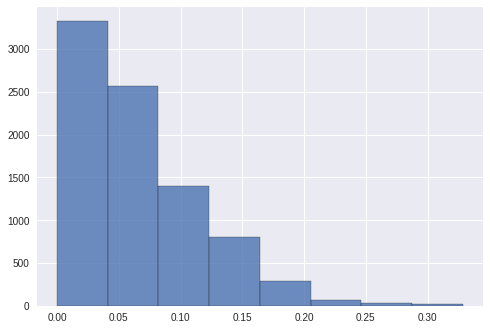

In [ ]:
plt.style.use('seaborn')
df_sales['Item_Visibility'].hist(bins = 8,
                                 alpha = 0.8,
                                 edgecolor = 'k')
plt.show()

Se observa que hay una tendencia hacia la izquierda en cuanto a la visibilidad del producto. Esto quiere decir que la mayoría de productos no tienen mucha exposición de los productos en las tiendas.

2. Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


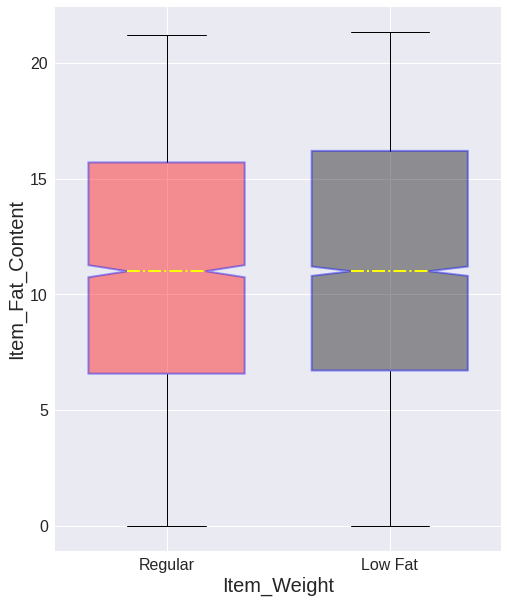

In [ ]:
regular = df_sales.loc[df_sales['Item_Fat_Content']=='Regular','Item_Weight']
LF = df_sales.loc[df_sales['Item_Fat_Content']=='Low Fat','Item_Weight']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,10))
boxplots = axes.boxplot([regular,LF],
           notch = True,
           labels=['Regular', 'Low Fat'],
           widths = .7,  
           patch_artist=True, 
           medianprops = dict(linestyle='-.',
                              linewidth=2, 
                              color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='blue', facecolor = 'black', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Item_Weight', fontsize = 20)
plt.ylabel('Item_Fat_Content', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

Se puede apreciar que el peso de los productos bajo en grasa y regulares tienen en promedio casi el mismo peso

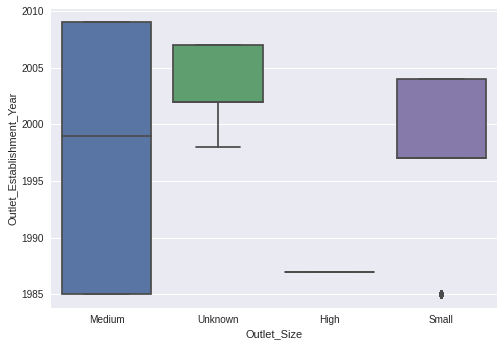

In [ ]:
sns.boxplot(x='Outlet_Size', y='Outlet_Establishment_Year', data=df_sales)

La mayor cantidad de tiendas 'Small' se han establecido en los años 1998 al 2005. Por el contrario, el establecimiento de las tiendas de tamaño 'Medium' no tiene un gran impacto en un rango de años en especifico, sino que a lo largo de toda la historia se ha ido estableciendo de forma continua. 

3. Mapa de calor de la correlación entre las características.

In [ ]:
corr = df_sales.corr()

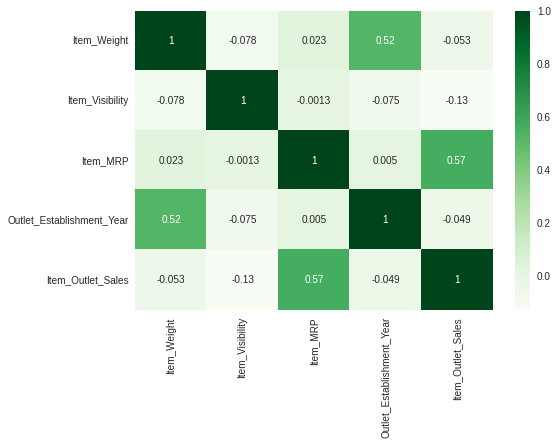

In [ ]:
import seaborn as sns
sns.heatmap(corr, 
            cmap = 'Greens', #(cmap = 'Blues' o cmap = 'Oranges')
            annot = True
            )

La gráfica de correlación nos muestra que los siguiente campos tienen una fuerte correlación:

*   'Item_MRP' y 'Item_Outlet_Sales'
*   'Item_Weight' y 'Outlet_Establishment_Year'






# **Análisis de Datos Explicativa**

Se analizará la ventas por el año de establecimiento del Outlet

In [ ]:
Establishment_Year_Outlet_Sales = df_sales.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum()
Establishment_Year_Outlet_Sales

Outlet_Establishment_Year
1985    3.633620e+06
1987    2.142664e+06
1997    2.118395e+06
1998    1.883402e+05
1999    2.183970e+06
2002    2.036725e+06
2004    2.268123e+06
2007    2.167465e+06
2009    1.851823e+06
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
Establishment_Year = np.array(Establishment_Year_Outlet_Sales.index)
Establishment_Year

array([1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009])

In [ ]:
Outlet_Sales = np.array(Establishment_Year_Outlet_Sales.values)
Outlet_Sales

array([3633620.145 , 2142663.5782, 2118395.1682,  188340.1724,
       2183969.8102, 2036725.477 , 2268122.9354, 2167465.294 ,
       1851822.83  ])

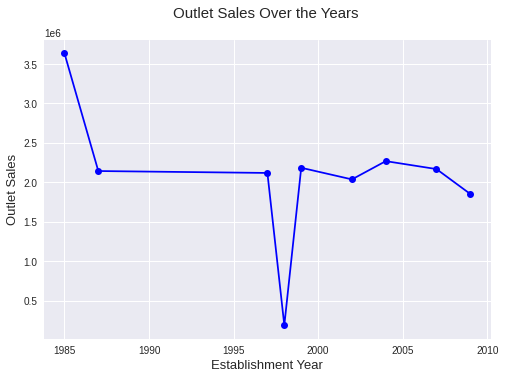

In [ ]:
# Gráfico de Tendencia 
plt.plot(Establishment_Year, Outlet_Sales, c= 'b', marker = 'o')
plt.xlabel('Establishment Year',fontsize = 13)
plt.ylabel('Outlet Sales',fontsize = 13)
plt.title('Outlet Sales Over the Years \n',fontsize = 15)
plt.show()

En el siguiente código se analizará en promedio cual es el porcentaje de visibilidad de los productos en la tienda por el año de establecimiento.

In [ ]:
Establishment_Year_Visibility = df_sales.groupby(['Outlet_Establishment_Year'])['Item_Visibility'].mean()
Establishment_Year_Visibility

Outlet_Establishment_Year
1985    0.076597
1987    0.059957
1997    0.060464
1998    0.101457
1999    0.060806
2002    0.060474
2004    0.061263
2007    0.061377
2009    0.061014
Name: Item_Visibility, dtype: float64

In [ ]:
Visibility = np.array(Establishment_Year_Visibility.values)
Visibility

array([0.07659727, 0.05995693, 0.06046438, 0.10145736, 0.06080554,
       0.06047447, 0.0612633 , 0.06137651, 0.0610145 ])

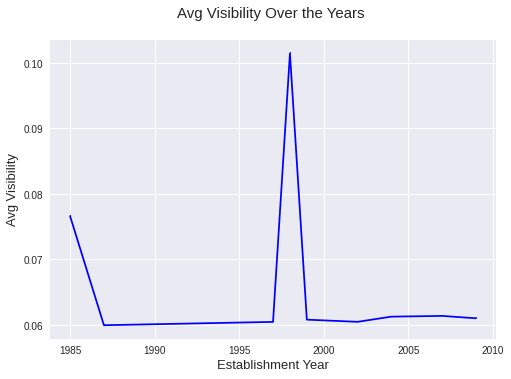

In [ ]:
# Gráfico de Tendencia 
plt.plot(Establishment_Year, Visibility, c= 'b', marker = ',')
plt.xlabel('Establishment Year',fontsize = 13)
plt.ylabel('Avg Visibility',fontsize = 13)
plt.title('Avg Visibility Over the Years \n',fontsize = 15)
plt.show()

# **Machine Learning**

In [3]:
# Importar librerias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [4]:
# Carga de datos
Sales_filename = '/content/drive/MyDrive/Cursos Data Science/Coding Dojo/1. Data Science Fundamentals/0. Fuente de Datos/sales_predictions.csv'
df_sales = pd.read_csv(Sales_filename)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Explorar los datos
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Codificación ordinal

In [8]:
#Codificación ordinal
df_sales['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [9]:
# Codificación ordinal "Outlet_Size"
replacement_dictionary = {'High':2, 'Medium':1, 'Small':0}
df_sales['Outlet_Size'].replace(replacement_dictionary, inplace=True)
df_sales['Outlet_Size']

0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64

## 1.Identifiquen el objetivo (X) y las características (y)
Asignen la columna "Item_Outlet_Sales" somo el objetivo y el resto de las variables relevantes como el matriz de características.  

In [10]:
columna_objetivo = 'Item_Outlet_Sales'

X = df_sales.drop(columna_objetivo, axis=1)
y = df_sales[columna_objetivo]

## 2.Realicen un train test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 3.Crear un pipeline de preprocesamiento

### 3.1. Identificar cada característica como numérica, ordinal o nominal

In [12]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

### 3.2. Imputar algún valor faltante.

In [13]:
# Imputers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

###3.3. Realizar una codificación one-hot a las características nominales 

In [14]:
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [15]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

### 3.4. Escalar las columnas numéricas

In [16]:
# Scaler
scaler = StandardScaler()

In [17]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

### 3.5. Objeto de preprocesamiento

In [18]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0948a9fbe0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0948a9f8b0>)])

### 3.6. Transformar los datos con el objeto de preprocesamiento

In [19]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0948a9fbe0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0948a9f8b0>)])

In [20]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [21]:
# Mostrar los datos del array de numpy resultante
X_train_processed

array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])